|決定木|
|:-|

決定木は、クラス分類と回帰タスクに広く用いられているモデルである。決定木では、Yes/Noで答えられる質問で構成された段階的な木構造を学習する。

質問は、「20の質問」ゲームで用いられるような質問である。例えば、４種類の動物、熊、鷹、ペンギン、イルカを区別したいとしよう。目的は、なるべく少ない質問で正しい答えにたどり着くことである。例えば、「その動物に羽毛があるか？」という質問から始めてみよう。この質問によって、可能な動物は２つになる。もし答えがYesだったなら、今度は鷹とペンギンを区別する質問をすればよい。例えば、「その動物は飛べるか？」という質問が考えられる。もし動物に羽毛がないなら、可能性のある動物はイルカか熊ということになるので、この２つを区別する質問をすればよい。例えば、「kの動物にヒレはあるか？」というような。

この一連の質問を決定木として表現することができる。（**図2-22**）

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

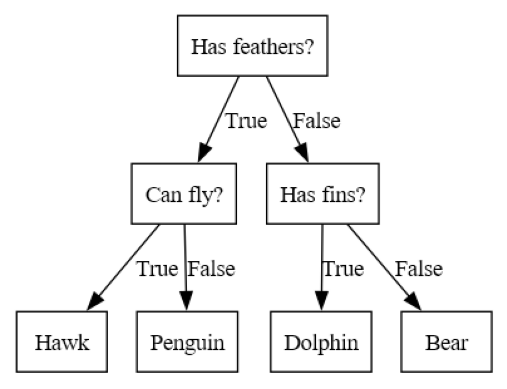

In [19]:
mglearn.plots.plot_animal_tree()

**図2-22 動物を区別する決定木**

この図からわかるように、木のノードは質問を表しているが、答えを表す終端ノード（**葉**（leaf）とも呼ばれる）かである。質問への返答を示すエッジの先が、次にする質問ということになる。

機械学習の用語でいえば、４クラスの動物（鷹、ペンギン、イルカ、熊）を３つの特長量（羽毛はあるか？飛べるか？ヒレはあるか？）で識別するモデルを作ったことになる。このようなモデを手で作るのではなく、データから教師あり学習によってつくることができる。

---

**図2-23**に示す２次元クラス分類データセットを用いて、決定木の構築過程を見てみよう。このデータセットはそれぞれ50データポイントからなる２つの半月形を組み合わせたような形になっている。このデータセットをtwo_moonsと呼ぶ。

決定木における学習は、政界に最も早くたどり着けるような一連のYes/No型の質問の学習を意味する。機械学習では、これらの質問は**テスト**（test）と呼ばれる（モデルの汎化性能を測るためのテストセットと混同しないように）。動物の例では特徴量はYes?No型となっていたが、通常のデータの特徴量は、**図2-23**に示す２次元データセットのように連続値になっている。連続値に対するテストは「特徴量$i$は$a$よりも大きいか？」という形をとる。

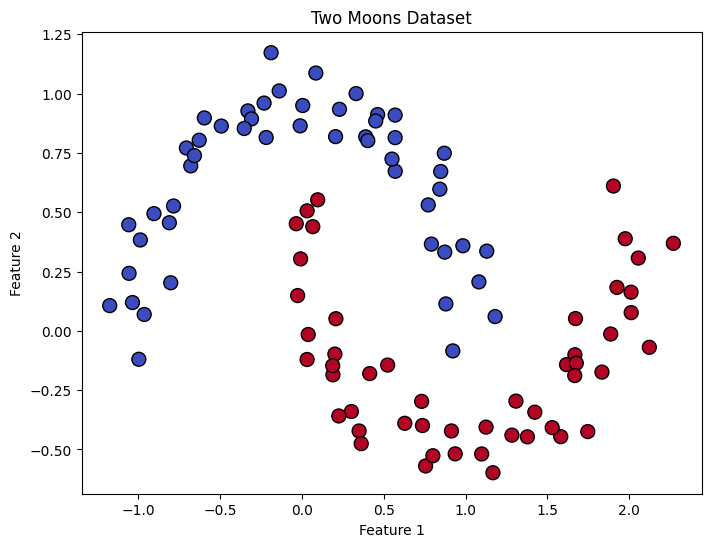

Number of class 0 samples: 50
Number of class 1 samples: 50


In [20]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# データセットを生成
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

# データのプロット
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=100, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Two Moons Dataset')
plt.show()

# データセットの各クラスの数
print('Number of class 0 samples: {}'.format(np.sum(y == 0)))
print('Number of class 1 samples: {}'.format(np.sum(y == 1)))



**図2-23 決定木の構築に用いるtwo-moonsデータセット**

決定木を構築する際、アルゴリズムはすべての可能なテストの中から、目的変数に対して最も情報量の多いものを選ぶ。**図2-24**に選択された最初のテストを示す。x[1]=0.0596で水平にデータセットを分割することが最も情報の量が多く、クラス０とクラス１をもっともよく分割する。頂点ノード（**ルート**（root）とも呼ばれる）はデータセット全体、つまりクラス０に属する50点とクラス１に属する50点を示す。x[1] <= 0.0596による分割は黒い線で示されている。あるデータポイントがこのテストに対して真の場合、左側のノードに割り当てられる。左側のノードにはクラス０が２点、クラス１が32点ある。テストが偽なら右ノードに割り当てられる。こちらにはクラス０が48点、クラス１にが18点ある。これらのノードは**図2-24**の上の領域と下の領域に対応する。税所の分割はかなりうまく２つのクラスを分割したが、下の領域にもクラス０に属する点があり、上の領域にもクラス１に属する点がある。このプロセスをそれぞれの領域に対して繰り返していくことにより、より正確なモデルを作ることができる。**図2-25**に、x[0]の値に対する最も情報の量がおおい、次の分割を示す。

In [21]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np

#! 決定木を描画する関数を定義
def decision_tree(max_depth):
  # データセットを生成
  X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

  # 決定木のモデルを作成 (depthを3に設定)
  clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
  clf.fit(X, y)

  # 決定境界を描画するためのグリッドを生成
  x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                      np.arange(y_min, y_max, 0.02))

  # 決定木による予測
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  # プロット
  plt.figure(figsize=(8, 6))
  plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)  # 決定境界の描画
  plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=plt.cm.coolwarm, edgecolors='k')  # データポイントのプロット
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title('Decision Boundary with Decision Tree (max_depth = ' + str(max_depth) + ')')
  plt.show()

  # 決定木のモデルを作成 (depthを3に設定)
  clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
  clf.fit(X, y)

  # 決定木をプロット
  plt.figure(figsize=(12, 8))
  tree.plot_tree(clf, filled=True, feature_names=['Feature 1', 'Feature 2'], class_names=['Class 0', 'Class 1'])
  plt.show()



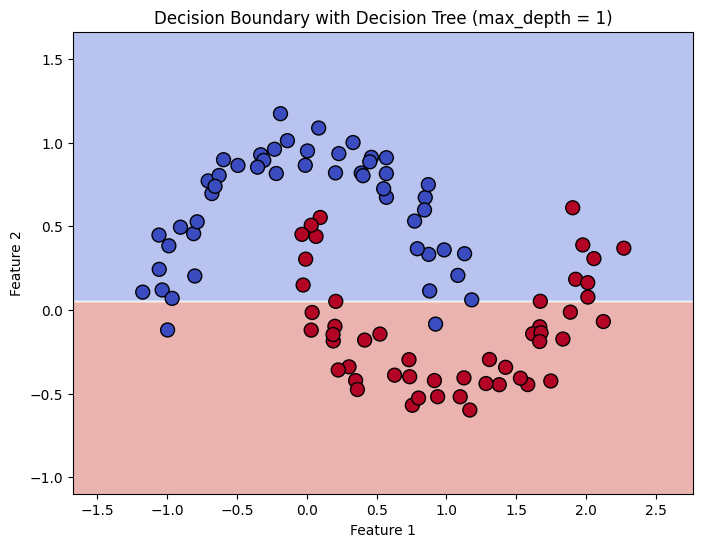

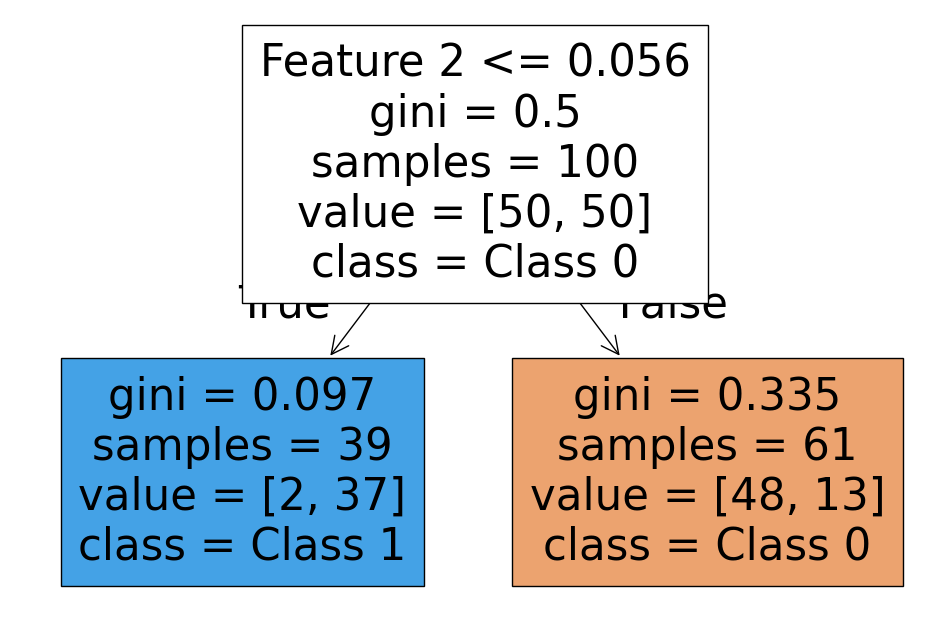

In [22]:
decision_tree(max_depth =1) # 深さ１の決定木描画

**図2-24 深さ１の決定木による決定境界と対応する決定木**

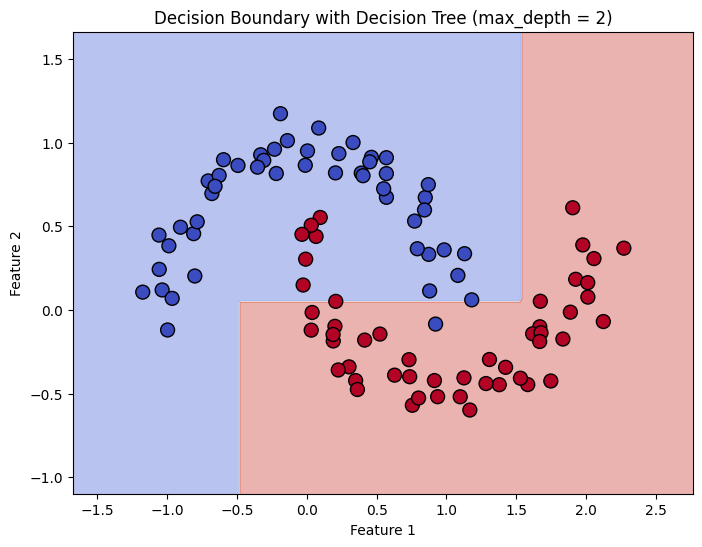

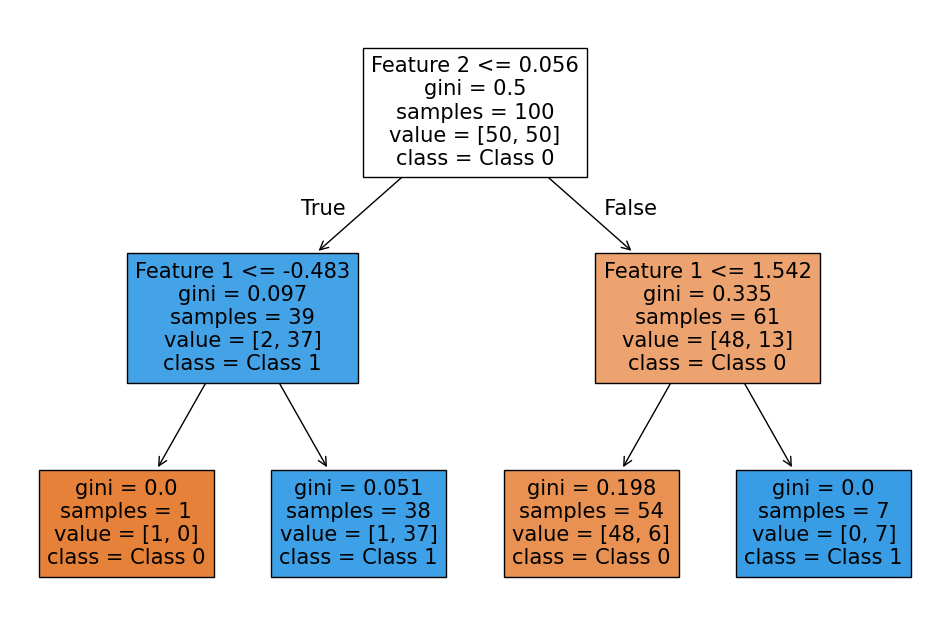

In [23]:
decision_tree(max_depth =2) # 深さ２の決定木描画

**図2-25 深さ２の決定木による決定境界と対応する決定木**

このプロセスを再帰的に繰り返すと、２分岐による決定木が得られる。個々のノードはテストに対応する。個々のテストは対象としている範囲のデータを、いずれかの軸に沿って分割していると考えることもできる。この見方では、アルゴリズムが階層的な分割を行っていることになる。個々のテストは１つの特長量子化考えないので、分割された領域は常に軸に平行な境界を持つ。

データの再起分割は、対象の領域（決定木の葉）に１つの対象値（１クラス、もしくは１つの回帰値）しか含まれなくなるまで繰り返される。１つの対象値のデータポイントしか含まないような決定木の葉を**純水**（pure）と呼ぶ。このデータセットに対する最終的な分割を**図2-26**に示す。

新しいデータポイントに対する予測は、そのデータポイントが属する特徴量空間上の分割領域によって行われる。その領域に含まれるデータポイントの多数が持つターゲット値が用いられる。（純粋な葉の倍にはその領域に対応するターゲット値は１つしかない）。データポイントが属する領域を探すには決定木を上から下に向かって、テストの真偽で左右を決めながらたどればよい。

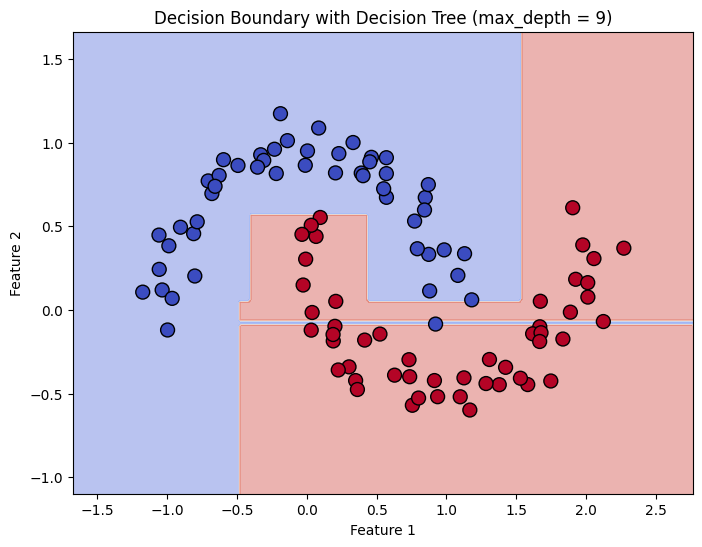

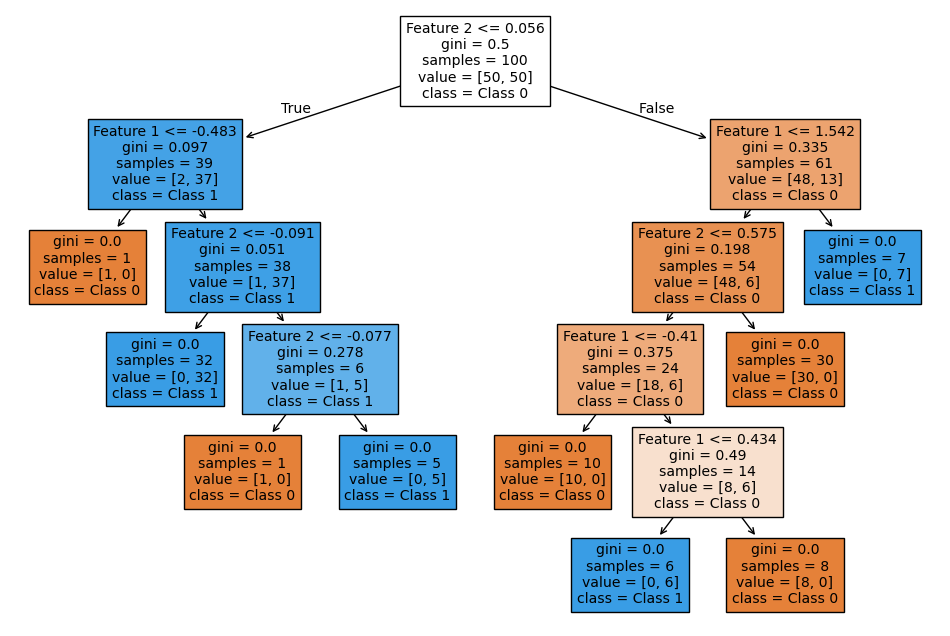

In [24]:
decision_tree(max_depth =9) # 深さ９の決定木描画

**図2-26 深さ９の決定木による決定境界と対応する決定木**

決定木にはまったく同じようにして回帰タスクに利用することもできる。予測を行うには、テストに基づいてノードをたどり、そのデータポイントが属する葉を求める。データポイントに対する出力は、その葉の中にある訓練データっぽ院との平均ターゲット値になる。